## 예제 데이터 세트

### 분류 또는 회귀용 데이터 세트

| API | 설명 |
|-----|------|
| `datasets.load_boston()` | 미국 보스턴의 집에 대한 특징과 가격 데이터 (회귀용) |
| `datasets.load_breast_cancer()` | 위스콘신 유방암 특징들과 악성/음성 레이블 데이터 (분류용) |
| `datasets.load_diabetes()` | 당뇨 데이터 (회귀용) |
| `datasets.load_digits()` | 0에서 9까지 숫자 이미지 픽셀 데이터 (분류용) |
| `datasets.load_iris()` | 붓꽃에 대한 특징을 가진 데이터 (분류용) |

### 예제 데이터 세트 구조

* 일반적으로 딕셔너리 형태로 구성
* data: 특징 데이터 세트
* target: 분류용은 레이블 값, 회귀용은 숫자 결과값 데이터
* target_names: 개별 레이블의 이름 (분류용)
* feature_names: 특징 이름
* DESCR: 데이터 세트에 대한 설명과 각 특징 설명

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [6]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [7]:
print(digits.images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## `model_selection` 모듈

### `train_test_split()`: 학습/테스트 데이터 세트 분리

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

model = LogisticRegression(max_iter = 6000)
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 0.9537037037037037


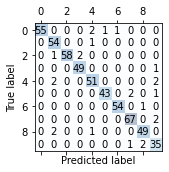

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predicted = model.predict(X_test)
expected = y_test
predict = model.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=predict)

fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]) :
    ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

### `cross_val_score()`: 교차 검증

In [28]:
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

scores = cross_val_score(model, digits.data, digits.target, cv=10)

print("교차 검증 정확도: {}".format(scores))
print("교차 검증 정확도: {} +/- {}".format(np.mean(scores), np.std(scores)))

교차 검증 정확도: [0.90555556 0.95555556 0.88333333 0.93333333 0.93888889 0.95
 0.95       0.9273743  0.88268156 0.94413408]
교차 검증 정확도: 0.9270856610800745 +/- 0.025844313931578673


### `GridSearchCV`: 교차 검증과 최적 하이퍼 파라미터 찾기

In [27]:
import multiprocessing
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

digits = load_digits()

param_grid = [{'penalty':['l1','l2'],
                'C':[0.1, 0.5, 1.0, 1.5, 2.0]}]

gs = GridSearchCV(estimator=LogisticRegression(max_iter = 6000), param_grid = param_grid,
                  scoring = 'accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

result = gs.fit(digits.data, digits.target)

print("최적의 점수: {}".format(result.best_score_))
print("최적의 파라미터: {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적의 점수: 0.9287523277467411
최적의 파라미터: {'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=6000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000312,0.000029,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,6.392688,1.487819,0.000649,0.000023,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.911111,0.955556,0.872222,0.933333,0.944444,0.961111,0.955556,0.927374,0.882682,0.944134,0.928752,0.029358,1
2,0.000289,0.000017,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,8.210879,2.500999,0.000628,0.000020,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.911111,0.950000,0.877778,0.933333,0.938889,0.955556,0.950000,0.932961,0.882682,0.949721,0.928203,0.026892,2
4,0.000294,0.000017,0.000000,0.000000,1,l1,"{'C': 1.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,7.281686,1.392018,0.000616,0.000026,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.905556,0.955556,0.883333,0.933333,0.938889,0.950000,0.950000,0.932961,0.882682,0.944134,0.927644,0.025905,4
6,0.000312,0.000028,0.000000,0.000000,1.5,l1,"{'C': 1.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,7.962038,2.240191,0.000629,0.000033,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",0.905556,0.955556,0.883333,0.933333,0.938889,0.955556,0.950000,0.932961,0.882682,0.944134,0.928200,0.026433,3
8,0.000312,0.000018,0.000000,0.000000,2,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,7.069752,1.786826,0.000600,0.000059,2,l2,"{'C': 2.0, 'penalty': 'l2'}",0.905556,0.955556,0.883333,0.933333,0.938889,0.950000,0.950000,0.932961,0.882682,0.944134,0.927644,0.025905,4


## `preprocessing` 데이터 전처리 모듈

### `StandardScaler`: 표준화 클래스

In [33]:
digits = load_digits()
digits_df = pd.DataFrame(data = digits.data)
digits_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,16.000000,15.000000,14.000000,2.000000,0.000000,0.000000,4.000000,15.000000,12.000000,13.000000,14.00

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
digits_scaled = scaler.fit_transform(digits_df)
digits_df_scaled = pd.DataFrame(data=digits_scaled)
digits_df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03
mean,0.0,-2.560865e-16,-2.347717e-16,-3.053268e-16,1.396892e-16,-3.169418e-16,-9.595984e-16,6.069466e-16,-4.623690e-16,7.550850e-17,-5.337967e-17,5.714837e-17,4.528623e-17,-1.495125e-17,8.965808e-16,-2.177199e-16,-6.879738e-16,-7.704219e-17,2.599788e-16,2.325475e-16,1.058789e-16,-1.408630e-16,-1.154088e-16,-2.264775e-16,4.511092e-16,3.793416e-17,-7.716575e-17,-9.600927e-17,-8.729800e-17,-1.506246e-16,-1.055978e-15,-2.521402e-16,0.0,3.421489e-16,1.217106e-16,-1.078714e-16,-2.006062e-16,-1.093542e-17,-7.129646e-17,0.0,3.007163e-16,-1.746578e-16,4.034366e-16,1.921112e-16,2.613380e-17,5.387393e-17,4.713969e-17,8.637591e-16,2.620485e-16,3.331287e-16,8.365286e-17,1.987759e-16,4.610175e-16,5.016701e-17,4.715822e-16,-4.920321e-16,2.253538e-16,3.441259e-16,5.952698e-17,-6.114606e-16,-5.190926e-16,1.695299e-16,1.787972e-16,-6.838961e-16
std,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,0.0,-3.350165e-01,-1.094937e+00,-2.786437e+00,-2.764242e+00,-1.020657e+00,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,-1.915573e+00,-3.012600e+00,-2.149886e+00,-1.351095e+00,-5.149915e-01,-1.304334e-01,-4.462507e-02,-7.276463e-01,-1.740702e+00,-1.205432e+00,-1.149648e+00,-1.259982e+00,-5.488055e-01,-1.142218e-01,-3.337973e-02,-7.851052e-01,-1.468627e+00,-1.499901e+00,-1.614063e+00,-1.286250e+00,-6.288959e-01,-4.723238e-02,0.0,-6.723723e-01,-1.212607e+00,-1.447630e+00,-1.736664e+00,-1.489861e+00,-8.226945e-01,0.0,-6.134367e-02,-5.312841e-01,-1.052835e+00,-1.122457e+00,-1.226033e+00,-1.446538e+00,-7.982722e-01,-8.874162e-02,-3.543326e-02,-4.035750e-01,-1.330331e+00,-1.825518e+00,-1.776459e+00,-1.452612e+00,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-1.089383e+00,-2.764171e+00,-2.394110e+00,-1.146647e+00,-5.056698e-01,-1.960075e-01
25%,0.0,-3.350165e-01,-8.845657e-01,-4.321998e-01,-4.311703e-01,-1.020657e+00,-4.097239e-01,-1.250229e-01,-5.907756e-02,-6.240093e-01,-8.085511e-01,-7.492665e-01,-6.858638e-01,-1.020586e+00,-5.149915e-01,-1.304334e-01,-4.462507e-02,-7.276463e-01,-8.618411e-01,-1.033049e+00,-9.876792e-01,-1.259982e+00,-5.488055e-01,-1.142218e-01,-3.337973e-02,-7.851052e-01,-9.839990e-01,-9.898100e-01,-9.636965e-01,-1.115919e+00,-6.288959e-01,-4.723238e-02,0.0,-6.723723e-01,-1.212607e+00,-9.68

In [36]:
X_train, X_test, y_train, y_test = train_test_split(digits_df_scaled, digits.target, test_size=0.3)

model = LogisticRegression(max_iter=6000)
model.fit(X_train, y_train)

print("훈련 데이터 점수: {}",format(model.score(X_train, y_train)))
print("훈련 데이터 점수: {}",format(model.score(X_test, y_test)))

훈련 데이터 점수: {} 0.9992044550517104
훈련 데이터 점수: {} 0.9777777777777777


### `MinMaxScaler`: 정규화 클래스

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
digits_scaled = scaler.fit_transform(digits_df)
digits_df_scaled = pd.DataFrame(data=digits_scaled)
digits_df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.037980,0.325299,0.739740,0.740505,0.361366,0.085142,0.008644,0.002782,0.124617,0.648894,0.748713,0.642460,0.510991,0.115401,0.008996,0.001391,0.162597,0.618948,0.437048,0.443621,0.487896,0.111784,0.006260,0.001113,0.164645,0.568204,0.551336,0.620444,0.471967,0.154517,0.002226,0.0,0.167104,0.479201,0.566987,0.643851,0.546501,0.207807,0.0,0.002226,0.098984,0.430092,0.451760,0.479514,0.514782,0.216020,0.004545,0.000904,0.044032,0.469185,0.596202,0.588516,0.547405,0.232819,0.015881,0.000556,0.031039,0.347350,0.755565,0.738070,0.422753,0.129243,0.022781
std,0.0,0.113399,0.297177,0.265553,0.267962,0.354151,0.207861,0.069159,0.047111,0.199760,0.338841,0.248596,0.298918,0.378310,0.224145,0.068993,0.031184,0.223519,0.355673,0.362666,0.385983,0.387333,0.203742,0.054825,0.033352,0.209769,0.387002,0.367684,0.384506,0.367035,0.245764,0.047140,0.0,0.248598,0.395293,0.391774,0.370843,0.366915,0.252663,0.0,0.036296,0.186364,0.408622,0.402586,0.391219,0.355970,0.270684,0.051226,0.025528,0.109135,0.352781,0.326684,0.331378,0.376947,0.307463,0.075723,0.023590,0.103811,0.318939,0.273418,0.308372,0.368789,0.255659,0.116258
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.062500,0.625000,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.562500,0.437500,0.125000,0.000000,0.000000,0.000000,0.000000,0.312500,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500,0.187500,0.250000,0.062500,0.000000,0.000000,0.0,0.000000,0.000000,0.187500,0.375000,0.187500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.062500,0.187500,0.000000,0.000000,0.000000,0.000000,0.125000,0.312500,0.312500,0.125000,0.000000,0.000000,0.000000,0.000000,0.062500,0.687500,0.625000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.250000,0.812500,0.812500,0.250000,0.000000,0.000000,0.000000,0.000000,0.750000,0.812500,0.687500,0.562500,0.000000,0.000000,0.000000,0.062500,0.750000,0.375000,0.375000,0.500000,0.000000,0.000000,0.000000,0.066667,0.687500,0.625000,0.750000,0.437500,0.000000,0.000000,0.0,0.000000,0.500000,0.625000,0.812500,0.625000,0.071429,0.0,0.000000,0.000000,0.375000,0.437500,0.500000,0.562500,0.062500,0.000000,0.000000,0.000000,0.500000,0.625000,0.625000,0.625000,0.062500,0.000000,0.000000,0.000000,0.250000,0.812500,0.875000,0.375000,0.000000,0.000000
75%,0.0,0.000000,0.562500,0.937500,0.937500,0.687500,0.000000,0.000000,0.000000,0.187500,0.937500,1.000000,0.937500,0.875000,0.125000,0.000000,0.000000,0.250000,0.937500,0.750000,0.812500,0.875000,0.187500,0.000000,0.000000,0.266667

In [38]:
X_train, X_test, y_train, y_test = train_test_split(digits_df_scaled, digits.target, test_size=0.3)

model = LogisticRegression(max_iter=6000)
model.fit(X_train, y_train)

print("훈련 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

훈련 데이터 점수: 0.9817024661893397
평가 데이터 점수: 0.9666666666666667
